In [64]:
import pdb
import pandas as pd
import numpy as np
import os
import random
from scipy import stats
from scipy.stats import gaussian_kde
from datetime import datetime, timedelta
from faker import Faker
import prince
np.random.seed(3101)
random_state = np.random.RandomState(3101)
fake = Faker()
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

# Importing data:
bank1 = archive  
bank2 = bank+marketing

In [65]:
# print(os.getcwd())
bank_df_train = pd.read_csv('./data/main/train.csv')
bank_df_test = pd.read_csv('./data/main/test.csv')

In [66]:
print(bank_df_train.head())
print(len(bank_df_train))

# bank_df_train_clean = bank_df_train.drop_duplicates(subset="CustomerId", keep="first")
# print(len(bank_df_train_clean))

   id  CustomerId         Surname  CreditScore Geography Gender       Age  \
0   0    15674932  Okwudilichukwu          668    France   Male 33.000000   
1   1    15749177   Okwudiliolisa          627    France   Male 33.000000   
2   2    15694510           Hsueh          678    France   Male 40.000000   
3   3    15741417             Kao          581    France   Male 34.000000   
4   4    15766172       Chiemenam          716     Spain   Male 33.000000   

   Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       3      0.000000              2   1.000000        0.000000   
1       1      0.000000              2   1.000000        1.000000   
2      10      0.000000              2   1.000000        0.000000   
3       2 148882.540000              1   1.000000        1.000000   
4       5      0.000000              2   1.000000        1.000000   

   EstimatedSalary  Exited  
0    181449.970000       0  
1     49503.500000       0  
2    184866.690000       0  
3     

In [67]:
print(bank_df_test.head())
len(bank_df_test)
# duplicates = bank_df_test.duplicated(subset=['CustomerId'], keep=False)
# print(duplicates)
#no "exited" column

       id  CustomerId    Surname  CreditScore Geography  Gender       Age  \
0  165034    15773898   Lucchese          586    France  Female 23.000000   
1  165035    15782418       Nott          683    France  Female 46.000000   
2  165036    15807120         K?          656    France  Female 34.000000   
3  165037    15808905  O'Donnell          681    France    Male 36.000000   
4  165038    15607314    Higgins          752   Germany    Male 38.000000   

   Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000000              2   0.000000        1.000000   
1       2      0.000000              1   1.000000        0.000000   
2       7      0.000000              2   1.000000        0.000000   
3       8      0.000000              1   1.000000        0.000000   
4      10 121263.620000              1   1.000000        0.000000   

   EstimatedSalary  
0    160976.750000  
1     72549.270000  
2    138882.090000  
3    113931.570000  
4    139431.00000

110023

Data Cleaning

Removed CustomerId column in both test & train since it is an unused var in the original dataset
All other columns returns no duplicates
scalling tenure too to when the bank opened

In [68]:
# bank_df_train = bank_df_train.loc[:, bank_df_train.columns!='CustomerId'] # extract all columns except for CustomerId
# print(bank_df_train[bank_df_train.duplicated() == True]) # check for duplicate columns 

# bank_df_test = bank_df_test.loc[:, bank_df_test.columns!='CustomerId']

### DELETE OR COMMENT OUT THIS LATER ###
# bank_df_train.drop_duplicates(subset=['CustomerId'], inplace=True)
# bank_df_test.drop_duplicates(subset=['CustomerId'], inplace=True)
### DELETE OR COMMENT OUT THIS LATER ###
bank_df_train['Age'] = bank_df_train['Age'].astype(int)
bank_df_test['Age'] = bank_df_test['Age'].astype(int)

n_train = len(bank_df_train)
n_test = len(bank_df_test)

aug_2022 = datetime(2022, 8, 31)
today = datetime.now()
months_since_aug_2022 = (today.year - aug_2022.year) * 12 + today.month - aug_2022.month - 1
def scale_int_to_months(int_val):
    return int_val * (months_since_aug_2022 / 10)
bank_df_train['Tenure'] = bank_df_train['Tenure'] * (months_since_aug_2022 / 10)
bank_df_train['Tenure'] = bank_df_train['Tenure'].astype(int)
print(bank_df_train['Tenure'].head(20))

0      5
1      1
2     19
3      3
4      9
5      7
6     15
7      1
8      7
9      7
10    11
11     5
12    17
13     9
14    13
15     9
16    13
17     7
18    15
19     1
Name: Tenure, dtype: int32


# Adding and populating features

### 13. Churn Date: The exact date the customer decided to exit.

In [69]:
start_date = datetime(2022, 8, 31)
end_date = end_date = datetime.now().strftime('%Y-%m-%d') 

# random_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# random_dates_str = random_dates.strftime('%Y-%m-%d')
# bank_df_train['ChurnDate'] = np.where(bank_df_train['Exited'] == 1, np.random.choice(random_dates_str) , np.nan) 
def generate_random_date(exited, tenure_months):
    if exited == 1:
        tenure_days = tenure_months * 30
        random_date = np.random.choice(pd.date_range(start=start_date + timedelta(days=tenure_days), end=end_date, freq='D'))
        return random_date
    else:
        return np.nan
bank_df_train['ChurnDate'] = bank_df_train.apply(lambda row: generate_random_date(row['Exited'], row['Tenure']), axis=1)

# random_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# random_dates_str = random_dates.strftime('%Y-%m-%d')
# bank_df_train['ChurnDate'] = np.where(bank_df_train['Exited'] == 1, np.random.choice(random_dates_str) , np.nan) 
# bank_df_train['ChurnDate'] = pd.to_datetime(bank_df_train['ChurnDate'])
print(bank_df_train[['Tenure', 'ChurnDate']].head(30))

    Tenure  ChurnDate
0        5        NaT
1        1        NaT
2       19        NaT
3        3        NaT
4        9        NaT
5        7 2023-10-15
6       15        NaT
7        1        NaT
8        7        NaT
9        7        NaT
10      11        NaT
11       5        NaT
12      17        NaT
13       9        NaT
14      13        NaT
15       9        NaT
16      13        NaT
17       7        NaT
18      15 2024-01-31
19       1 2023-03-08
20      17        NaT
21      15        NaT
22      17        NaT
23      17 2024-03-24
24      11        NaT
25      17 2024-03-03
26       5        NaT
27       3        NaT
28       7 2023-08-15
29      11        NaT


### 14. Sign Up Date: When did the customer create an account
has to be linked with churn date if any, and tenure. Tenure is usually rounded down, so (not needed anymore)


In [70]:
# def generate_signon_date(churn_date, tenure, exited):
#     if exited == 0:
#         churn_date = datetime.now().strftime('%Y-%m-%d')
#     churn_date = pd.to_datetime(churn_date)
#     max = churn_date - pd.DateOffset(years=tenure)
#     min = churn_date - pd.DateOffset(years=(tenure + 1))
#     random_dates = pd.date_range(min, max, freq='D').strftime('%Y-%m-%d')
#     random_date = np.random.choice(random_dates)
#     return random_date


# bank_df_train['SignDate'] = bank_df_train.apply(lambda row: generate_signon_date(row['ChurnDate'], row['Tenure'], row['Exited']), axis = 1)
# print(bank_df_train[['SignDate', 'ChurnDate', 'Tenure']].head(10))

# bank_df_test['SignDate'] = bank_df_train.apply(lambda row: generate_signon_date("2023-12-31", row['Tenure'], 0), axis = 1)
# # print(bank_df_train_clean.head(10))
# bank_df_train['SignDate'] = pd.to_datetime(bank_df_train['SignDate'])

### 15.Transaction History Freq
Detailed transaction data offers insights into spending patterns and engagement. (Transaction frequency in the last 28 days)

In [71]:
transaction_df = pd.read_excel('./data/transaction_history.xlsx')

# print(transaction_df.head())
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'])

grouped_df = transaction_df.groupby('Account No')

results = []
for group_name, group_data in grouped_df:
    # Get max and min dates for the group
    max_date = group_data['DATE'].max()
    min_date = max_date - pd.Timedelta(days=28)
    
    # Filter group data for transactions within the date range
    filtered_group = group_data[(group_data['DATE'] >= min_date) & (group_data['DATE'] <= max_date)]
    
    # Calculate transaction frequency and amount for the group
    transaction_frequency = len(filtered_group)
    transaction_amount = filtered_group['DEPOSIT AMT'].sum()
    
    # Append results to the list
    results.append({
        'Account No': group_name,
        'Total Transaction Amount': transaction_amount,
        'Transaction Frequency': transaction_frequency
    })

# Create DataFrame from results
result_df = pd.DataFrame(results)

result_df['Total Transaction Amount'] = result_df['Total Transaction Amount'].astype(int)
pd.options.display.float_format = '{:,.0f}'.format
# print(result_df['Total Transaction Amount'])

# print("Minimum date in the dataset:", min_date)
# print("Maximum date in the dataset:", max_date)

kde_freq = gaussian_kde(result_df['Transaction Frequency'])
kde_amnt = gaussian_kde(result_df['Total Transaction Amount'])
# print(result_df['Total Transaction Amount'])

fake_data_freq = kde_freq.resample(len(bank_df_train)).flatten()
fake_data_freq = np.round(fake_data_freq).astype(int)
bank_df_train['TransactionFreq'] = fake_data_freq
fake_data_freq = kde_freq.resample(len(bank_df_test)).flatten()
fake_data_freq = np.round(fake_data_freq).astype(int)
bank_df_test['TransactionFreq'] = fake_data_freq

# fake_data_amt = kde_amnt.resample(len(bank_df_train)).flatten()
# # fake_data_amt = np.round(fake_data_amt).astype(int)
# bank_df_train['TransactionAmnt'] = fake_data_amt
# fake_data_amt = kde_amnt.resample(len(bank_df_test)).flatten()
# # fake_data_amt = np.round(fake_data_amt).astype(int)
# bank_df_test['TransactionAmnt'] = fake_data_amt

# print(bank_df_train['TransactionAmnt'].head())
date_28_days_ago = datetime.now() - timedelta(days=28)

bank_df_train['TransactionFreq'] = np.where(
    (bank_df_train['ChurnDate'] <= date_28_days_ago),
    0,
    bank_df_train['TransactionFreq']
)

bank_df_test['TransactionFreq'] = np.where(
    (bank_df_test['IsActiveMember'] == 0),
    0,
    bank_df_test['TransactionFreq']
)

bank_df_train['TransactionFreq'] = np.maximum(bank_df_train['TransactionFreq'], 0)
bank_df_test['TransactionFreq'] = np.maximum(bank_df_test['TransactionFreq'], 0)

min_train_value = bank_df_train['TransactionFreq'].min()
max_train_value = bank_df_train['TransactionFreq'].max()
min_test_value = bank_df_test['TransactionFreq'].min()
max_test_value = bank_df_test['TransactionFreq'].max()

def scale_transaction_freq_train(freq):
    scaled_freq = ((freq - min_train_value) / (max_train_value - min_train_value)) * 150
    return scaled_freq

def scale_transaction_freq_test(freq):
    scaled_freq = ((freq - min_test_value) / (max_test_value - min_test_value)) * 150
    return scaled_freq

bank_df_train['TransactionFreq'] = bank_df_train['TransactionFreq'].apply(scale_transaction_freq_train).astype(int)

bank_df_test['TransactionFreq'] = bank_df_test['TransactionFreq'].apply(scale_transaction_freq_test).astype(int)

print(bank_df_train[['ChurnDate', 'TransactionFreq']].head(20))

    ChurnDate  TransactionFreq
0         NaT               24
1         NaT                0
2         NaT               64
3         NaT                7
4         NaT                0
5  2023-10-15                0
6         NaT               28
7         NaT               88
8         NaT               12
9         NaT               19
10        NaT                6
11        NaT                0
12        NaT                0
13        NaT               28
14        NaT               20
15        NaT                0
16        NaT               41
17        NaT                0
18 2024-01-31                0
19 2023-03-08                0


### 16. Transaction History Amt
Detailed transaction data offers insights into spending patterns and engagement. (Transaction amount in the last 28 days)


In [72]:
# Import reference set
# Warning: File size slightly big
trans_hist_data = pd.read_excel('./data/transaction_history.xlsx')

trans_hist_data.dtypes
# trans_hist_data.describe()

# Extract the most recent 2 sets of 3 months assuming the most recent data is the most accurate
trans_1st_3mths = trans_hist_data[(trans_hist_data['DATE'] >= pd.to_datetime('2019-01')) & (trans_hist_data['DATE'] <= pd.to_datetime('2019-03'))]
trans_2ns_3mths = trans_hist_data[(trans_hist_data['DATE'] >= pd.to_datetime('2018-10')) & (trans_hist_data['DATE'] <= pd.to_datetime('2018-12'))]

trans_dist_data = trans_1st_3mths.groupby('Account No').agg({'VALUE DATE': 'size', 'WITHDRAWAL AMT':'sum', 'DEPOSIT AMT': 'sum'}).reset_index()
trans_dist_data['TOTAL AMT'] = -trans_dist_data['WITHDRAWAL AMT'] + trans_dist_data['DEPOSIT AMT']

# kde = gaussian_kde(trans_dist_data['VALUE DATE'])
# train['Transaction Freq'] = abs(kde.resample(n_train).flatten()).astype(int)

kde = gaussian_kde(trans_dist_data['TOTAL AMT'])
bank_df_train['TransactionAmt'] = kde.resample(n_train).flatten().astype(float)
bank_df_test['TransactionAmt'] = kde.resample(n_test).flatten().astype(float)

date_28_days_ago = datetime.now() - timedelta(days=28)

bank_df_train['TransactionAmt'] = np.where(
    (bank_df_train['ChurnDate'] <= date_28_days_ago),
    0,
    bank_df_train['TransactionAmt']
)

bank_df_train['TransactionAmt'] = np.where(
    (bank_df_train['TransactionFreq'] == 0),
    0,
    bank_df_train['TransactionAmt']
)

bank_df_test['TransactionAmt'] = np.where(
    (bank_df_test['TransactionFreq'] == 0),
    0,
    bank_df_test['TransactionAmt']
)

new_min = -20000
new_max = 20000

current_min = bank_df_train['TransactionAmt'].min()
current_max = bank_df_train['TransactionAmt'].max()

# Perform Min-Max scaling
bank_df_train['TransactionAmt'] = ((bank_df_train['TransactionAmt'] - current_min) / (current_max - current_min)) * (new_max - new_min) + new_min


print(bank_df_train[['ChurnDate', 'TransactionFreq', 'TransactionAmt']].head(20))
# print(bank_df_test[['TransactionFreq', 'TransactionAmt']].head(20))

    ChurnDate  TransactionFreq  TransactionAmt
0         NaT               24            -746
1         NaT                0           5,537
2         NaT               64           2,847
3         NaT                7          -2,119
4         NaT                0           5,537
5  2023-10-15                0           5,537
6         NaT               28           4,170
7         NaT               88             405
8         NaT               12           3,586
9         NaT               19           2,101
10        NaT                6          -1,029
11        NaT                0           5,537
12        NaT                0           5,537
13        NaT               28          -4,393
14        NaT               20           6,414
15        NaT                0           5,537
16        NaT               41          -9,399
17        NaT                0           5,537
18 2024-01-31                0           5,537
19 2023-03-08                0           5,537


In [73]:
#np.random.uniform(0, 1, size=bank_df_train.shape[0])

#bank_df_train.loc[bank_df_train['TransactionAmt'] > bank_df_train['Balance'], 'TransactionAmt'] = bank_df_train.loc[bank_df_train['TransactionAmt'] > bank_df_train['Balance'], 'TransactionAmt'] * unif[bank_df_train['TransactionAmt'] > bank_df_train['Balance']]
#bank_df_train['TransactionAmt'] > bank_df_train['Balance'] == True

# print(bank_df_train['TransactionAmt'].head(20))

### 17.Service Support Frequency (per mth)

In [74]:

support_freq = pd.read_csv("./data/support_frequency.csv")
kde = gaussian_kde(support_freq['no_of_cases'])
bank_df_train['ServiceSupportFrequency'] = abs(kde.resample(n_train).flatten()/12).astype(int)
bank_df_test['ServiceSupportFrequency'] = abs(kde.resample(n_test).flatten()/12).astype(int)

print(bank_df_train['ServiceSupportFrequency'])


0          4
1          4
2         12
3          0
4         45
          ..
165029     1
165030    11
165031     6
165032    25
165033     2
Name: ServiceSupportFrequency, Length: 165034, dtype: int32


### 18.Months Inactive
Indicates customer disengagement, potentially preceding churn. 

In [75]:
np.random.seed(3101)
bank_df_train['MonthsInactive'] = np.minimum(np.random.normal(0.5, 1.5, n_train), bank_df_train['Tenure'] * 12)
bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)

bank_df_test['MonthsInactive'] = bank_df_test.apply(lambda row: 
    np.random.normal(0.5, 1.5) if row['TransactionFreq'] == 0 else 0,
    axis=1)

def set_max_to_tenure(row):
    return min(row['MonthsInactive'], row['Tenure'])

bank_df_train['MonthsInactive'] = np.maximum(bank_df_train['MonthsInactive'], 0)
bank_df_train['MonthsInactive'] = bank_df_train.apply(set_max_to_tenure, axis=1)
bank_df_train['MonthsInactive'] = bank_df_train['MonthsInactive'].astype(int)
bank_df_test['MonthsInactive'] = np.maximum(bank_df_test['MonthsInactive'], 0)
bank_df_test['MonthsInactive'] = bank_df_test.apply(set_max_to_tenure, axis=1)
bank_df_test['MonthsInactive'] = bank_df_test['MonthsInactive'].astype(int)

# print(bank_df_train['MonthsInactive'].head(20))
print(bank_df_test['MonthsInactive'].head(20))

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    2
15    0
16    0
17    2
18    0
19    0
Name: MonthsInactive, dtype: int32


### 19.Net Promoter Score (NPS)
Measure of customer satisfaction and loyalty.
Scaled from 1 to 10 


In [76]:
nps = pd.read_csv('./data/NPS.csv')

nps_data = nps.groupby('Customer Name').agg({'NPS':'mean'}).reset_index()
kde = gaussian_kde(nps_data['NPS'])
bank_df_train['NPS'] = abs(kde.resample(n_train).flatten()).astype(int)
bank_df_test['NPS'] = abs(kde.resample(n_test).flatten()).astype(int)
bank_df_train['NPS'] = np.ceil(bank_df_train['NPS']/12*10)
bank_df_test['NPS'] = np.ceil(bank_df_test['NPS']/12*10)
print(bank_df_train['NPS'].describe())

count   165,034
mean          6
std           3
min           0
25%           4
50%           7
75%           8
max          10
Name: NPS, dtype: float64


### 20.Education
Education level might influence financial behavior and churn.
Shld be correlated to 5. Acct Balance


In [77]:
education_marital = pd.read_csv("./data/education_marital.csv")

education = education_marital['Education_Level'].unique()

edu, counts = np.unique(education, return_counts=True)
value_to_index = {value: i for i, value in enumerate(edu)}
numerical_data = [value_to_index[value] for value in education]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [edu[index] for index in resampled_indices]
resampled_values_test = [edu[index] for index in resampled_indices_test]

bank_df_train['Education'] = resampled_values
bank_df_test['Education'] = resampled_values_test

def convert_phd_to_postdoc(edu_level):
    if edu_level == 'PHD':
        # Randomly choose between 'PHD' and 'Post-Doc' with equal probability
        return np.random.choice(['PHD', 'Post-Doc'])
    else:
        return edu_level  # Keep other education levels unchanged

bank_df_train['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
bank_df_train['Education'].replace({'Uneducated': 'O/N'}, inplace=True)
bank_df_train['Education'].replace({'High School': 'A'}, inplace=True)
bank_df_train['Education'].replace({'College': 'Diploma'}, inplace=True)
bank_df_train['Education'].replace({'Graduate': 'Bachelors'}, inplace=True)
bank_df_train['Education'].replace({'Post-Graduate': 'Masters'}, inplace=True)
bank_df_train['Education'].replace({'Doctorate': 'PHD'}, inplace=True)

bank_df_train['Education'] = bank_df_train['Education'].apply(convert_phd_to_postdoc)

bank_df_test['Education'].replace({'Unknown': 'PSLE'}, inplace=True)
bank_df_test['Education'].replace({'Uneducated': 'O/N'}, inplace=True)
bank_df_test['Education'].replace({'High School': 'A'}, inplace=True)
bank_df_test['Education'].replace({'College': 'Diploma'}, inplace=True)
bank_df_test['Education'].replace({'Graduate': 'Bachelors'}, inplace=True)
bank_df_test['Education'].replace({'Post-Graduate': 'Masters'}, inplace=True)
bank_df_test['Education'].replace({'Doctorate': 'PHD'}, inplace=True)

bank_df_test['Education'] = bank_df_test['Education'].apply(convert_phd_to_postdoc)

print(bank_df_train['Education'].head(30))

0             A
1           PHD
2             A
3           O/N
4       Diploma
5             A
6           O/N
7     Bachelors
8       Masters
9           O/N
10          PHD
11          PHD
12         PSLE
13      Diploma
14      Diploma
15    Bachelors
16          O/N
17     Post-Doc
18          O/N
19     Post-Doc
20     Post-Doc
21          O/N
22         PSLE
23            A
24      Masters
25          O/N
26          PHD
27      Masters
28     Post-Doc
29          O/N
Name: Education, dtype: object


### 21.Employment Status
Indicates financial stability, affecting churn likelihood. 
Shld be correlated to 5. Acct Balance & 21. Education  

In [78]:
employment = pd.read_csv("./data/employment.csv")

employment_data = employment['job'].unique()

employment_status, counts = np.unique(employment_data, return_counts=True)
value_to_index = {value: i for i, value in enumerate(employment_status)}
numerical_data = [value_to_index[value] for value in employment_data]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)
pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [employment_status[index] for index in resampled_indices]
resampled_values_test = [employment_status[index] for index in resampled_indices_test]

bank_df_train['EmploymentStatus'] = resampled_values
bank_df_test['EmploymentStatus'] = resampled_values_test

bank_df_train['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'blue-collar': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'entrepreneur': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'housemaid': 'Parttime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'management': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'retired': 'Retired'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'student': 'Student'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'services': 'Fulltime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'self-employed': 'Self-employed'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'technician': 'Parttime'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'unemployed': 'Unemployed'}, inplace=True)
bank_df_train['EmploymentStatus'].replace({'unknown': 'Parttime'}, inplace=True)

bank_df_test['EmploymentStatus'].replace({'admin.': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'blue-collar': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'entrepreneur': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'housemaid': 'Parttime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'management': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'retired': 'Retired'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'student': 'Student'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'services': 'Fulltime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'self-employed': 'Self-employed'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'technician': 'Parttime'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'unemployed': 'Unemployed'}, inplace=True)
bank_df_test['EmploymentStatus'].replace({'unknown': 'Parttime'}, inplace=True)

print(bank_df_train['EmploymentStatus'].head(20))

0     Unemployed
1       Fulltime
2       Fulltime
3        Student
4       Fulltime
5        Retired
6       Parttime
7     Unemployed
8       Fulltime
9       Fulltime
10      Parttime
11    Unemployed
12      Parttime
13      Parttime
14      Fulltime
15      Fulltime
16       Student
17      Fulltime
18      Fulltime
19    Unemployed
Name: EmploymentStatus, dtype: object


### 22.Marital Status
Can impact financial decision-making and churn behavior. 

In [79]:
education_marital = pd.read_csv("./data/education_marital.csv")

marital_status = education_marital['Marital_Status'].unique()

marital, counts = np.unique(marital_status, return_counts=True)
value_to_index = {value: i for i, value in enumerate(marital)}
numerical_data = [value_to_index[value] for value in marital_status]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [marital[index] for index in resampled_indices]
resampled_values_test = [marital[index] for index in resampled_indices_test]

bank_df_train['MaritalStatus'] = resampled_values
bank_df_test['MaritalStatus'] = resampled_values_test

bank_df_train['MaritalStatus'].replace({'Unknown': 'Divorced'}, inplace=True)
bank_df_test['MaritalStatus'].replace({'Unknown': 'Divorced'}, inplace=True)

print(bank_df_train['MaritalStatus'].head(20))

0       Single
1      Married
2     Divorced
3     Divorced
4      Married
5     Divorced
6     Divorced
7       Single
8     Divorced
9     Divorced
10     Married
11    Divorced
12    Divorced
13    Divorced
14     Married
15    Divorced
16    Divorced
17     Married
18    Divorced
19    Divorced
Name: MaritalStatus, dtype: object


### 23.Housing Status
Reflects stability and long-term commitment, influencing churn. 

In [80]:
housing = pd.read_csv("./data/housing.csv")

housing_status = housing['House_Ownership'].unique()

house, counts = np.unique(housing_status, return_counts=True)
value_to_index = {value: i for i, value in enumerate(house)}
numerical_data = [value_to_index[value] for value in housing_status]

kde = gaussian_kde(numerical_data)

x_values = np.unique(numerical_data)
pdf_values = kde(x_values)

pmf = pdf_values / np.sum(pdf_values)

resampled_indices = np.random.choice(x_values, size=n_train, p=pmf)
resampled_indices_test = np.random.choice(x_values, size=n_test, p=pmf)

resampled_values = [house[index] for index in resampled_indices]
resampled_values_test = [house[index] for index in resampled_indices_test]

bank_df_train['HousingStatus'] = resampled_values
bank_df_test['HousingStatus'] = resampled_values_test


print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

   Balance  NumOfProducts  ...  ChurnDate  TransactionFreq  TransactionAmt  \
0        0              2  ...        NaT               24            -746   
1        0              2  ...        NaT                0           5,537   
2        0              2  ...        NaT               64           2,847   
3  148,883              1  ...        NaT                7          -2,119   
4        0              2  ...        NaT                0           5,537   

   ServiceSupportFrequency MonthsInactive  NPS  Ed

### 24.Number of Dependents
Impacts financial priorities and risk tolerance, affecting churn.

In [81]:
dependants_df = pd.read_csv('./data/education+dependents+maritalstatus/BankChurners.csv')

kde = gaussian_kde(dependants_df['Dependent_count'])

bank_df_train['Dependants'] = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
bank_df_train['Dependants'] = np.round(bank_df_train['Dependants']).astype(int)
bank_df_test['Dependants'] = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
bank_df_test['Dependants'] = np.round(bank_df_test['Dependants']).astype(int)

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

   Balance  NumOfProducts  ...  TransactionFreq  TransactionAmt  \
0        0              2  ...               24            -746   
1        0              2  ...                0           5,537   
2        0              2  ...               64           2,847   
3  148,883              1  ...                7          -2,119   
4        0              2  ...                0           5,537   

   ServiceSupportFrequency  MonthsInactive NPS  Education  EmploymentStatus  \
0                        4           

### 25.Marketing Offers Accepted
Indicates responsiveness to incentives, affecting churn. Range 0-1, (percentage of marketing offers they accept, e.g.5 offer, 4 accepted, the value of the column 0.8)

In [82]:
marketing_df = pd.read_csv('./data/marketing offers/marketing_campaign.csv', sep=';')


marketing_df["MarketingOffersAcceptance"] = (marketing_df['AcceptedCmp1'] + marketing_df['AcceptedCmp2'] + marketing_df['AcceptedCmp3'] + marketing_df['AcceptedCmp4'] + marketing_df['AcceptedCmp5']) / 5
# print(marketing_df.head())

kde = gaussian_kde(marketing_df['MarketingOffersAcceptance'])

bank_df_train['MarketingOffersAcceptance'] = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
bank_df_test['MarketingOffersAcceptance'] = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

   Balance  NumOfProducts  ...  TransactionAmt  ServiceSupportFrequency  \
0        0              2  ...            -746                        4   
1        0              2  ...           5,537                        4   
2        0              2  ...           2,847                       12   
3  148,883              1  ...          -2,119                        0   
4        0              2  ...           5,537                       45   

   MonthsInactive  NPS Education  EmploymentStatus  MaritalStatus  \

### 26.Channel Used for Transactions
Reflects preferred banking channels and engagement level. 
faker

In [83]:
transaction_channel_df = pd.read_csv('./data/main_payment_method/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# print(transaction_channel_df.head())
methods = transaction_channel_df['PaymentMethod'].unique().tolist()
# print(methods)
faked_data = [random.choice(methods) for _ in range(len(bank_df_train))]
faked_data_2 = [random.choice(methods) for _ in range(len(bank_df_test))]

bank_df_train['PaymentMethod'] = faked_data
bank_df_test['PaymentMethod'] = faked_data_2

bank_df_train['PaymentMethod'].replace({'Bank transfer (automatic)': 'Intrabank transfer (GXS Savings Account only)'}, inplace=True)
bank_df_train['PaymentMethod'].replace({'Electronic check': 'PayNow'}, inplace=True)
bank_df_train['PaymentMethod'].replace({'Credit card (automatic)': 'Debit card'}, inplace=True)
bank_df_train['PaymentMethod'].replace({'Mailed check': 'FAST'}, inplace=True)

bank_df_test['PaymentMethod'].replace({'Bank transfer (automatic)': 'Intrabank transfer (GXS Savings Account only)'}, inplace=True)
bank_df_test['PaymentMethod'].replace({'Electronic check': 'PayNow'}, inplace=True)
bank_df_test['PaymentMethod'].replace({'Credit card (automatic)': 'Debit card'}, inplace=True)
bank_df_test['PaymentMethod'].replace({'Mailed check': 'FAST'}, inplace=True)

print(bank_df_train['PaymentMethod'].head(10))

0                                           PayNow
1    Intrabank transfer (GXS Savings Account only)
2                                           PayNow
3    Intrabank transfer (GXS Savings Account only)
4                                             FAST
5                                             FAST
6    Intrabank transfer (GXS Savings Account only)
7                                             FAST
8    Intrabank transfer (GXS Savings Account only)
9                                             FAST
Name: PaymentMethod, dtype: object


### 27.Customer Satisfaction Surveys
Provides direct feedback on satisfaction levels, predicting churn. 

In [84]:
cust_satisfaction_df = pd.read_csv('./data/satisfaction score/Customer-Churn-Records.csv')

kde = gaussian_kde(cust_satisfaction_df['Satisfaction Score'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 5)
fake_data = np.round(fake_data).astype(int)

fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 5)
fake_data_2 = np.round(fake_data_2).astype(int)

bank_df_train['CustomerSatisfaction'] = fake_data
bank_df_test['CustomerSatisfaction'] = fake_data_2
# print(len(bank_df_test))
# print(len(fake_data_2))

print(bank_df_train['CustomerSatisfaction'].head(10))

0    5
1    4
2    5
3    4
4    2
5    4
6    5
7    1
8    4
9    2
Name: CustomerSatisfaction, dtype: int32


### 28.Feature Satisfaction
Scale on 1 to 5


In [85]:
feature_df = pd.read_csv('./data/feature_and_support_satisfaction/Customer-survey-data.csv')
feature_df = feature_df.dropna()
kde = gaussian_kde(feature_df['How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'])
bank_df_train['FeatureSatisfaction'] = kde.resample(len(bank_df_train)).flatten().astype(int)
bank_df_test['FeatureSatisfaction'] = kde.resample(len(bank_df_test)).flatten().astype(int)

print(bank_df_train['FeatureSatisfaction'].head())

0    4
1    4
2    4
3    2
4    5
Name: FeatureSatisfaction, dtype: int32


### 29.Support Satisfaction
Scale on 1 to 5


In [86]:
feature_df = pd.read_csv('./data/feature_and_support_satisfaction/Customer-survey-data.csv')
feature_df = feature_df.dropna()
kde = gaussian_kde(feature_df['How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied'])
bank_df_train['SupportSatisfaction'] = kde.resample(len(bank_df_train)).flatten().astype(int)
bank_df_test['SupportSatisfaction'] = kde.resample(len(bank_df_test)).flatten().astype(int)

print(bank_df_train['SupportSatisfaction'].head())

0    3
1    1
2    2
3    4
4    0
Name: SupportSatisfaction, dtype: int32


### 30. Feature support frequency

Higher calls might indicate issues and dissatisfaction, affecting churn. Past year. Past month 


In [87]:
support_freq = pd.read_csv("./data/support_frequency.csv")

kde = gaussian_kde(support_freq['no_of_cases'])
bank_df_train['FeatureSupportFrequency'] = abs(kde.resample(n_train).flatten()/12).astype(int)
bank_df_test['FeatureSupportFrequency'] = abs(kde.resample(n_test).flatten()/12).astype(int)
print(bank_df_train.head())


   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

   Balance  NumOfProducts  ...  EmploymentStatus  MaritalStatus  \
0        0              2  ...        Unemployed         Single   
1        0              2  ...          Fulltime        Married   
2        0              2  ...          Fulltime       Divorced   
3  148,883              1  ...           Student       Divorced   
4        0              2  ...          Fulltime        Married   

   HousingStatus  Dependants MarketingOffersAcceptance  \
0   norent_noown           2                         0   


### 31.Relationship Count
Reflects the breadth of the customer's relationship with the bank.
Shld be correlated to 6: No. of products   

In [88]:
relationship_count = pd.read_csv('./data/loan/credit_train.csv')
relationship_count['Current Loan Amount'].fillna(0, inplace=True) 

if np.any(np.isinf(relationship_count['Current Loan Amount'])):
    # Handle infinite values, such as replacing them with a large finite value
    relationship_count['Current Loan Amount'].replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


median_loan_amount = relationship_count['Current Loan Amount'].median()
below_median = relationship_count[relationship_count['Current Loan Amount'] < median_loan_amount]
above_median = relationship_count[relationship_count['Current Loan Amount'] >= median_loan_amount]

# print(above_median)
kde_upper = gaussian_kde(above_median['Current Loan Amount'])
kde_lower = gaussian_kde(below_median['Current Loan Amount'])

bank_df_train['RelationshipCount'] = np.where(bank_df_train['CustomerSatisfaction'] >= 4, abs(kde_upper.resample(n_train).flatten()/12).astype(int) , abs(kde_lower.resample(n_train).flatten()/12).astype(int))
bank_df_test['RelationshipCount'] = np.where(bank_df_test['CustomerSatisfaction'] >= 4, abs(kde_upper.resample(n_test).flatten()/12).astype(int) , abs(kde_lower.resample(n_test).flatten()/12).astype(int))

min_value = bank_df_train['RelationshipCount'].min()
max_value = bank_df_train['RelationshipCount'].max()
min_value_2 = bank_df_test['RelationshipCount'].min()
max_value_2 = bank_df_test['RelationshipCount'].max()
new_min_value = 3000
new_max_value = 30000

def scale_values(value):
    scaled_value = new_min_value + ((value - min_value) / (max_value - min_value)) * (new_max_value - new_min_value)
    return scaled_value

def scale_values_2(value):
    scaled_value = new_min_value + ((value - min_value_2) / (max_value_2 - min_value_2)) * (new_max_value - new_min_value)
    return scaled_value

bank_df_train['RelationshipCount'] = bank_df_train['RelationshipCount'].apply(scale_values)
bank_df_test['RelationshipCount'] = bank_df_test['RelationshipCount'].apply(scale_values_2)

# kde = gaussian_kde(relationship_count['Current Loan Amount'])
# bank_df_train['RelationshipCount'] = abs(kde.resample(n_train).flatten()/12).astype(int)

print(bank_df_train['RelationshipCount'].head(10))
print(bank_df_train['RelationshipCount'].max())
print(bank_df_train['RelationshipCount'].min())

0    3,476
1    3,133
2    4,379
3    3,120
4    3,069
5   24,967
6    3,009
7    3,069
8    4,232
9    3,030
Name: RelationshipCount, dtype: float64
30000.0
3000.0


### 32. Income Source
Indicates financial stability and potential churn risk. 

In [89]:
# income_source_df = pd.read_csv('./data/income source/adult.csv')

# # print(transaction_channel_df.head())
# income_sourcs = income_source_df['workclass'].unique().tolist()
# income_sourcs.remove('?')
# print(income_sourcs)
# faked_data = [random.choice(income_sourcs) for _ in range(len(bank_df_train))]
# faked_data_2 = [random.choice(income_sourcs) for _ in range(len(bank_df_test))]

# bank_df_train['IncomeSource'] = faked_data
# bank_df_test['IncomeSource'] = faked_data_2

def choose_value(row):
    if row['EmploymentStatus'] == 'Fulltime' or row['EmploymentStatus'] == 'Parttime':
        return np.random.choice(['Employment', 'Investment'])
    elif row['EmploymentStatus'] == 'Retired':
        return np.random.choice(['Retirement', 'Rental', 'Investment'])
    elif row['EmploymentStatus'] == 'Student':
        return np.random.choice(['Allowance', 'Employment'])
    elif row['EmploymentStatus'] == 'Self-employed':
        return 'Self-employment'
    elif row['EmploymentStatus'] == 'Unemployed':
        return np.random.choice(['Rental', 'Investment', 'Allowance'])
    
bank_df_train['IncomeSource'] = bank_df_train.apply(choose_value, axis=1)
print(bank_df_train[['EmploymentStatus', 'IncomeSource']].head(10))

  EmploymentStatus IncomeSource
0       Unemployed   Investment
1         Fulltime   Investment
2         Fulltime   Investment
3          Student    Allowance
4         Fulltime   Investment
5          Retired   Investment
6         Parttime   Investment
7       Unemployed   Investment
8         Fulltime   Investment
9         Fulltime   Investment


### 33. Credit Utilization
Reflects financial health and potential churn risk for credit customers.

In [90]:
credit_df = pd.read_csv('./data/credit utilization/BankChurners.csv')

kde = gaussian_kde(credit_df['Avg_Utilization_Ratio'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 1)
# fake_data = np.round(fake_data).astype(int)
fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 1)

bank_df_train['CreditUtilization'] = fake_data
bank_df_test['CreditUtilization'] = fake_data_2

print(bank_df_train.head())

   id  CustomerId         Surname  CreditScore Geography Gender  Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male   33       5   
1   1    15749177   Okwudiliolisa          627    France   Male   33       1   
2   2    15694510           Hsueh          678    France   Male   40      19   
3   3    15741417             Kao          581    France   Male   34       3   
4   4    15766172       Chiemenam          716     Spain   Male   33       9   

   Balance  NumOfProducts  ...  Dependants  MarketingOffersAcceptance  \
0        0              2  ...           2                          0   
1        0              2  ...           1                          0   
2        0              2  ...           2                          0   
3  148,883              1  ...           3                          0   
4        0              2  ...           4                          0   

                                   PaymentMethod  CustomerSatisfaction  \
0     

### 34. Response to Previous Retention Efforts
Records success or failure of previous retention efforts, guiding future strategies. % 0-1

In [91]:
retention_df = pd.read_csv('./data/retention/HR_comma_sep.csv')

kde = gaussian_kde(retention_df['promotion_last_5years'])

fake_data = np.maximum(kde.resample(len(bank_df_train)).flatten(), 0)
fake_data = np.minimum(fake_data.flatten(), 1)

fake_data_2 = np.maximum(kde.resample(len(bank_df_test)).flatten(), 0)
fake_data_2 = np.minimum(fake_data_2.flatten(), 1)


bank_df_train['Retention'] = fake_data
bank_df_test['Retention'] = fake_data_2

print(bank_df_train['Retention'].head(20))

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
10   0
11   0
12   0
13   0
14   0
15   0
16   0
17   0
18   0
19   0
Name: Retention, dtype: float64


### 35. Change in behavior before n after
Average of percentage of increase/decrease (ranging from 0 - infinity, but most of the times it will be ard 0-2)

In [92]:
bank_df_train['ChangeInBehaviourMkt'] = np.random.normal(1, 0.25, len(bank_df_train))
bank_df_test['ChangeInBehaviourMkt']= np.random.normal(1, 0.25, len(bank_df_test))
# test = np.random.normal(1, 0.25, len(bank_df_train))
# # print(test)
# bank_df_train['ChangeInBehaviourMkt'] = test.astype(float)

print(bank_df_train['ChangeInBehaviourMkt'].head(10))

0   1
1   1
2   1
3   1
4   1
5   1
6   1
7   0
8   1
9   1
Name: ChangeInBehaviourMkt, dtype: float64


### 36. Change in behavior before n after for Support

In [93]:
bank_df_train['ChanegInBehaviourCust'] = np.random.normal(1, 0.25, len(bank_df_train))
bank_df_test['ChanegInBehaviourCust']= np.random.normal(1, 0.25, len(bank_df_test))

print(bank_df_train['ChanegInBehaviourCust'].head())

0   1
1   1
2   1
3   1
4   1
Name: ChanegInBehaviourCust, dtype: float64


### 37. Previous Lifecycle status 

In [94]:
life_cycles = ['Active', 'Dormant', 'Reactivated'] #everything but churned

bank_df_train['PrevLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if row['Exited'] == 1 else np.random.choice(life_cycles), axis=1)
bank_df_test['PrevLifecycle'] = np.random.choice(life_cycles, size=len(bank_df_test))

# print(bank_df_train['PrevLifecycle'].head(10))
print(bank_df_test['PrevLifecycle'].head(10))

0        Dormant
1        Dormant
2        Dormant
3         Active
4        Dormant
5    Reactivated
6        Dormant
7         Active
8    Reactivated
9        Dormant
Name: PrevLifecycle, dtype: object


### 38. Current Lifecycle status 

In [95]:
prev_active = ['Active', 'Dormant'] #excluding churn, also same for reactivated
prev_dormant = ['Dormant', 'Reactivated'] #excluding churn

# bank_df_train['CurrLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if row['PrevLifecycle'] == 'Churned' else \
#                                                     np.random.choice(prev_active) if (row['PrevLifecycle'] == 'Active' or row['PrevLifecycle'] == 'Reactivated') else \
#                                                     np.random.choice(prev_dormant) if row['PrevLifecycle'] == 'Dormant' else \
#                                                     np.nan, axis=1)
bank_df_train['CurrLifecycle'] = bank_df_train.apply(lambda row: 'Churned' if row['PrevLifecycle'] == 'Churned' else \
                                                     'Reactivated' if (row['PrevLifecycle'] == 'Dormant' and row['TransactionFreq'] > 0) else \
                                                     'Dormant' if row['TransactionFreq'] == 0 else \
                                                     'Active', axis=1)

print(bank_df_train[['PrevLifecycle', 'CurrLifecycle']].head(10))


  PrevLifecycle CurrLifecycle
0   Reactivated        Active
1   Reactivated       Dormant
2        Active        Active
3   Reactivated        Active
4       Dormant       Dormant
5       Churned       Churned
6       Dormant   Reactivated
7       Dormant   Reactivated
8        Active        Active
9        Active        Active


### 39. Customer Happiness Status 
1 == happy, 0 == unhappy

Customer satisfaction survey score 

Relationship Count 

Response to previous retention efforts (no more yay)

if we want the top 15.9%


In [96]:
happiness_benchmark = 84.1

# bank_df_train['Happiness'] = bank_df_train.apply(lambda row: 1 if row['CustomerSatisfaction'] + \
#                                                                   row['FeatureSatisfaction'] + \
#                                                                   row['SupportSatisfaction'] + \
#                                                                   row['NPS'] + \
#                                                                   row['Tenure'] >= happiness_benchmark else \
#                                                                   0, axis=1)


# need to delete Custpercentile, RsPercentile and ResponsePercentile later
bank_df_train['CustPercentile'] = bank_df_train['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))
bank_df_train['RsPercentile'] = bank_df_train['RelationshipCount'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))

bank_df_test['CustPercentile'] = bank_df_test['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))
bank_df_test['RsPercentile'] = bank_df_test['RelationshipCount'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))

# print(bank_df_train['CustPercentile'].head(10))
bank_df_train['Happiness'] = bank_df_train.apply(lambda row: 1 if (row['CustPercentile'] > happiness_benchmark and \
                                                                   row['RsPercentile'] > happiness_benchmark ) else 0, axis=1)
bank_df_train.drop(columns=['CustPercentile', 'RsPercentile'], inplace=True)

bank_df_test['Happiness'] = bank_df_test.apply(lambda row: 1 if (row['CustPercentile'] > happiness_benchmark and \
                                                                   row['RsPercentile'] > happiness_benchmark ) else 0, axis=1)
bank_df_test.drop(columns=['CustPercentile', 'RsPercentile'], inplace=True)

# print(bank_df_train['Happiness'].head(10))
# print("percentage happy =", (bank_df_train['Happiness'] == 1).mean() * 100)
print(bank_df_test['Happiness'].head(10))
print("percentage happy =", (bank_df_test['Happiness'] == 1).mean() * 100)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Happiness, dtype: int64
percentage happy = 20.065804422711615


### 40.Price Sensitivity %
26. marketing offers accepted %
35. change in behaviour %

Mkting Offers Accepted
Change in behavior before n after for mkting offer 


In [97]:
# MarketingOffersAcceptance_df = bank_df_train['MarketingOffersAcceptance'].apply(lambda x: stats.percentileofscore(bank_df_train['MarketingOffersAcceptance'], x))
# ChangeInBehaviourMkt_df = bank_df_train['ChangeInBehaviourMkt'].apply(lambda x: stats.percentileofscore(bank_df_train['ChangeInBehaviourMkt'], x))

# MarketingOffersAcceptance_df_2 = bank_df_test['MarketingOffersAcceptance'].apply(lambda x: stats.percentileofscore(bank_df_test['MarketingOffersAcceptance'], x))
# ChangeInBehaviourMkt_df_2 = bank_df_test['ChangeInBehaviourMkt'].apply(lambda x: stats.percentileofscore(bank_df_test['ChangeInBehaviourMkt'], x))
# # print(MarketingOffersAcceptance_df.head())
# # print(ChangeInBehaviourMkt_df.head())
# bank_df_train['PriceSensitivity'] = (MarketingOffersAcceptance_df + ChangeInBehaviourMkt_df) / 2
# bank_df_test['PriceSensitivity'] = (MarketingOffersAcceptance_df_2 + ChangeInBehaviourMkt_df_2) / 2

# print(bank_df_train['PriceSensitivity'].head(20))

In [98]:
bank_df_train['PriceSensitive'] = ((bank_df_train['MarketingOffersAcceptance'].rank(pct=True)*100).astype(int)+(bank_df_train['ChangeInBehaviourMkt'].rank(pct=True)*100).astype(int))/2
bank_df_test['PriceSensitive'] = ((bank_df_test['MarketingOffersAcceptance'].rank(pct=True)*100).astype(int)+(bank_df_test['ChangeInBehaviourMkt'].rank(pct=True)*100).astype(int))/2

### 41.Feature Driven % 
28. Customer satisfaction survey 0-5
6. num products 1-4
29. Feature Satisfaction 0-5

Number of products last 1 year
Feature Satisfaction Column (0 to 1)
Feature Support freq


In [99]:
# print(bank_df_train['NumOfProducts'].max())
# print(bank_df_train['NumOfProducts'].min())

# feature_driven = bank_df_train['CustomerSatisfaction'] + bank_df_train['NumOfProducts'] + bank_df_train['FeatureSatisfaction']
# percentiles = np.percentile(feature_driven, [0, 25, 50, 75, 100]) 

# def assign_percentile(metric):
#     if metric <= percentiles[1]:
#         return ((metric / percentiles[1]) * 25)
#     elif metric <= percentiles[2]:
#         return (25 + ((metric - percentiles[1]) / (percentiles[2] - percentiles[1])) * 25)
#     elif metric <= percentiles[3]:
#         return (50 + ((metric - percentiles[2]) / (percentiles[3] - percentiles[2])) * 25)
#     else:
#         return (75 + ((metric - percentiles[3]) / (percentiles[4] - percentiles[3])) * 25)
        
# bank_df_train['FeatureSensitivity'] = feature_driven.apply(assign_percentile)
# bank_df_train['FeatureSensitivity'] = bank_df_train['FeatureSensitivity'].replace(np.NaN, 0, regex=True)

# CustomerSatisfaction_df = bank_df_train['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['CustomerSatisfaction'], x))
# NumOfProducts_df = bank_df_train['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_train['NumOfProducts'], x))
# FeatureSatisfaction_df = bank_df_train['FeatureSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['FeatureSatisfaction'], x))
# FeatureSupportFrequency_df = bank_df_train['FeatureSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['FeatureSatisfaction'], x))

# CustomerSatisfaction_df_2 = bank_df_test['CustomerSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['CustomerSatisfaction'], x))
# NumOfProducts_df_2 = bank_df_test['NumOfProducts'].apply(lambda x: stats.percentileofscore(bank_df_test['NumOfProducts'], x))
# FeatureSatisfaction_df_2 = bank_df_test['FeatureSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['FeatureSatisfaction'], x))
# FeatureSupportFrequency_df_2 = bank_df_test['FeatureSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_test['FeatureSatisfaction'], x))

# bank_df_train['FeatureSensitivity'] = (CustomerSatisfaction_df + NumOfProducts_df + FeatureSatisfaction_df + FeatureSupportFrequency_df) / 4
# bank_df_test['FeatureSensitivity'] = (CustomerSatisfaction_df_2 + NumOfProducts_df_2 + FeatureSatisfaction_df_2 + FeatureSupportFrequency_df_2) / 4

# print(bank_df_train['FeatureSensitivity'].head(20))

In [100]:
bank_df_train['FeatureDriven'] = ((bank_df_train['CustomerSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['NumOfProducts'].rank(pct=True)*100).astype(int)+(bank_df_train['FeatureSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['FeatureSupportFrequency'].rank(pct=True)*100).astype(int))/4
bank_df_test['FeatureDriven'] = ((bank_df_test['CustomerSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['NumOfProducts'].rank(pct=True)*100).astype(int)+(bank_df_test['FeatureSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['FeatureSupportFrequency'].rank(pct=True)*100).astype(int))/4


### 42.Service Dependent % 
31. service support freq per month number
39. Customer Happiness Status binary
36. Change in behavior before n after for Support %

CALL Support frequency
Support Satisfaction Column (0 to 1)
Change in behavior before n after support

In [101]:
# print(bank_df_train['ServiceSupportFrequency'])
# CallSupportFrequency_df = bank_df_train['CallSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['CallSupportFrequency'], x))
# ServiceSupportFrequency_df = bank_df_train['ServiceSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_train['ServiceSupportFrequency'], x))
# SupportSatisfaction_df = bank_df_train['SupportSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_train['SupportSatisfaction'], x))
# ChanegInBehaviourCust_df = bank_df_train['ChanegInBehaviourCust'].apply(lambda x: stats.percentileofscore(bank_df_train['ChanegInBehaviourCust'], x))

# ServiceSupportFrequency_df_2 = bank_df_test['ServiceSupportFrequency'].apply(lambda x: stats.percentileofscore(bank_df_test['ServiceSupportFrequency'], x))
# SupportSatisfaction_df_2 = bank_df_test['SupportSatisfaction'].apply(lambda x: stats.percentileofscore(bank_df_test['SupportSatisfaction'], x))
# ChanegInBehaviourCust_df_2 = bank_df_test['ChanegInBehaviourCust'].apply(lambda x: stats.percentileofscore(bank_df_test['ChanegInBehaviourCust'], x))

# bank_df_train['ServiceSensitivity'] = (ServiceSupportFrequency_df + SupportSatisfaction_df + ChanegInBehaviourCust_df) / 3
# bank_df_test['ServiceSensitivity'] = (ServiceSupportFrequency_df_2 + SupportSatisfaction_df_2 + ChanegInBehaviourCust_df_2) / 3

# print(bank_df_train['ServiceSensitivity'].head())

In [102]:
bank_df_train['ServiceDependent'] = ((bank_df_train['ServiceSupportFrequency'].rank(pct=True)*100).astype(int)+(bank_df_train['SupportSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_train['ChanegInBehaviourCust'].rank(pct=True)*100).astype(int))/3
bank_df_test['ServiceDependent'] = ((bank_df_test['ServiceSupportFrequency'].rank(pct=True)*100).astype(int)+(bank_df_test['SupportSatisfaction'].rank(pct=True)*100).astype(int)+(bank_df_test['ChanegInBehaviourCust'].rank(pct=True)*100).astype(int))/3
print(bank_df_train['ServiceDependent'].head())

0   35
1   27
2   52
3   54
4   51
Name: ServiceDependent, dtype: float64


### 43.Customer Personas 

In [103]:
print(bank_df_train[['PriceSensitive', 'FeatureDriven', 'ServiceDependent']])

        PriceSensitive  FeatureDriven  ServiceDependent
0                   68             64                35
1                   78             68                27
2                   24             59                52
3                   30             39                54
4                   44             61                51
...                ...            ...               ...
165029              74             33                32
165030              16             39                39
165031              66             28                51
165032              52             37                72
165033              83             39                29

[165034 rows x 3 columns]


In [104]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Restore default warning behavior after your code
# warnings.simplefilter(action='default', category=FutureWarning)

persona_df = bank_df_train[['PriceSensitive', 'FeatureDriven', 'ServiceDependent']]
largest_values = persona_df.max(axis=1)
smallest_values = persona_df.min(axis=1)

sum_values = persona_df.sum(axis=1)
second_largest_values = sum_values - largest_values - smallest_values
first_diff = largest_values - second_largest_values
second_diff = largest_values - smallest_values

def get_columns(row):
    sorted_indices = np.argsort(row)[::-1]  # Sort indices in descending order of values
    largest_index = sorted_indices[0]  # Index of the largest value
    second_largest_index = sorted_indices[1]  # Index of the second largest value
    smallest_index = sorted_indices[-1]  # Index of the smallest value
    return (persona_df.columns[largest_index], persona_df.columns[second_largest_index], persona_df.columns[smallest_index])

columns_tuple = persona_df.apply(get_columns, axis=1)
bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']] = pd.DataFrame(columns_tuple.tolist(), index=persona_df.index)
bank_df_train.loc[first_diff > 10, ['SecondPersona', 'ThirdPersona']] = np.nan
bank_df_train.loc[second_diff > 10, ['ThirdPersona']] = np.nan

print(bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].head(10))

persona_df_2 = bank_df_test[['PriceSensitive', 'FeatureDriven', 'ServiceDependent']]
largest_values_2 = persona_df_2.max(axis=1)
smallest_values_2 = persona_df_2.min(axis=1)

sum_values_2 = persona_df_2.sum(axis=1)
second_largest_values_2 = sum_values_2 - largest_values_2 - smallest_values_2
first_diff_2 = largest_values_2 - second_largest_values_2
second_diff_2 = largest_values_2 - smallest_values_2

columns_tuple_2 = persona_df_2.apply(get_columns, axis=1)
bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']] = pd.DataFrame(columns_tuple.tolist(), index=persona_df.index)

bank_df_test.loc[first_diff_2 > 10, ['SecondPersona', 'ThirdPersona']] = np.nan
bank_df_test.loc[second_diff_2 > 10, ['ThirdPersona']] = np.nan

print(bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']].head(20))
# print(persona_df_2.head(10))


       FirstPersona     SecondPersona ThirdPersona
0    PriceSensitive     FeatureDriven          NaN
1    PriceSensitive     FeatureDriven          NaN
2     FeatureDriven  ServiceDependent          NaN
3  ServiceDependent               NaN          NaN
4     FeatureDriven  ServiceDependent          NaN
5  ServiceDependent               NaN          NaN
6    PriceSensitive               NaN          NaN
7  ServiceDependent    PriceSensitive          NaN
8    PriceSensitive     FeatureDriven          NaN
9     FeatureDriven  ServiceDependent          NaN
        FirstPersona     SecondPersona ThirdPersona
0     PriceSensitive               NaN          NaN
1     PriceSensitive               NaN          NaN
2      FeatureDriven               NaN          NaN
3   ServiceDependent     FeatureDriven          NaN
4      FeatureDriven  ServiceDependent          NaN
5   ServiceDependent     FeatureDriven          NaN
6     PriceSensitive  ServiceDependent          NaN
7   ServiceDependent   

In [105]:
columns_to_normalize = ['PriceSensitive', 'FeatureDriven', 'ServiceDependent']

bank_df_train[columns_to_normalize] = bank_df_train[columns_to_normalize].div(bank_df_train[columns_to_normalize].sum(axis=1), axis=0) * 100
# bank_df_train['CustomerPersona'] = bank_df_train[columns_to_normalize].idxmax(axis=1)

bank_df_test[columns_to_normalize] = bank_df_test[columns_to_normalize].div(bank_df_test[columns_to_normalize].sum(axis=1), axis=0) * 100
# bank_df_test['CustomerPersona'] = bank_df_test[columns_to_normalize].idxmax(axis=1)

print(bank_df_train[['PriceSensitive', 'FeatureDriven', 'ServiceDependent']])

        PriceSensitive  FeatureDriven  ServiceDependent
0                   41             38                21
1                   45             40                16
2                   18             44                38
3                   25             31                44
4                   28             39                33
...                ...            ...               ...
165029              53             24                23
165030              17             42                42
165031              46             20                35
165032              32             23                45
165033              55             26                19

[165034 rows x 3 columns]


### 44. Social Influencer

In [106]:
social_benchmark = 84.1

bank_df_train['SocialInfluencer'] = bank_df_train['NPS'].apply(lambda x: stats.percentileofscore(bank_df_train['NPS'], x))
bank_df_train['SocialInfluencer'] = bank_df_train.apply(lambda row: 1 if (row['SocialInfluencer'] > happiness_benchmark) else 0, axis=1)

bank_df_test['SocialInfluencer'] = bank_df_test['NPS'].apply(lambda x: stats.percentileofscore(bank_df_test['NPS'], x))
bank_df_test['SocialInfluencer'] = bank_df_test.apply(lambda row: 1 if (row['SocialInfluencer'] > happiness_benchmark) else 0, axis=1)

print(bank_df_train['SocialInfluencer'].head(10))
print("percentage social influencer =", (bank_df_train['SocialInfluencer'] == 1).mean() * 100)

0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: SocialInfluencer, dtype: int64
percentage social influencer = 16.587491062447736


### 45. Combined Personas column

In [107]:
# bank_df_train['CombinedPersonas'] = bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
# bank_df_test['CombinedPersonas'] = bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)
def combine_personas(row):
    if ('PriceSensitive' in row.values) and ('FeatureDriven' in row.values) and ('ServiceDependent' in row.values):
        return 'Price-sensitive, Feature-driven, Service-dependent'
    elif ('PriceSensitive' in row.values) and ('FeatureDriven' in row.values):
        return 'Price-sensitive, Feature-driven'
    elif ('PriceSensitive' in row.values) and ('ServiceDependent' in row.values):
        return 'Price-sensitive, Service-dependent'
    elif ('FeatureDriven' in row.values) and ('ServiceDependent' in row.values):
        return 'Feature-driven, Service-dependent'
    elif 'PriceSensitive' in row.values:
        return 'Price-sensitive'
    elif 'FeatureDriven' in row.values:
        return 'Feature-driven'
    elif 'ServiceDependent' in row.values:
        return 'Service-dependent'
bank_df_train['CombinedPersonas'] = bank_df_train[['FirstPersona', 'SecondPersona', 'ThirdPersona']].apply(combine_personas, axis=1)
print(bank_df_train['CombinedPersonas'].head(10))

0       Price-sensitive, Feature-driven
1       Price-sensitive, Feature-driven
2     Feature-driven, Service-dependent
3                     Service-dependent
4     Feature-driven, Service-dependent
5                     Service-dependent
6                       Price-sensitive
7    Price-sensitive, Service-dependent
8       Price-sensitive, Feature-driven
9     Feature-driven, Service-dependent
Name: CombinedPersonas, dtype: object


# Removing useless columns

In [108]:
# print(bank_df_train.dtypes)
useless_cols = ['id', 'CustomerId', 'Surname', 'Geography', 'Exited', 'IsActiveMember', 'CreditScore', 'HasCrCard']
useless_cols_2 = ['id', 'CustomerId', 'Surname', 'Geography', 'IsActiveMember', 'CreditScore', 'HasCrCard']
# to_one_hot_encode_cols = ['Gender', 'Education', 'Employment Status', 'Marital Status', 'Housing Status', 'PaymentMethod', 'IncomeSource', 'PrevLifecycle', 'CurrLifecycle', 'CustomerPersona']

bank_df_train.drop(columns=useless_cols, inplace=True)
bank_df_test.drop(columns=useless_cols_2, inplace=True)
# bank_df_train = pd.get_dummies(bank_df_train, columns=to_one_hot_encode_cols)



In [109]:
# reference_date = bank_df_train['ChurnDate'].min()
# bank_df_train['ChurnDate_Numeric'] = (bank_df_train['ChurnDate'] - reference_date).dt.days
# bank_df_train['ChurnDate_Numeric'] = pd.to_numeric(bank_df_train['ChurnDate'])


print(bank_df_train.dtypes)
print(bank_df_train.head(10))
print(bank_df_test[['FirstPersona', 'SecondPersona', 'ThirdPersona', 'Happiness', 'SocialInfluencer']].head(10))

# to get our dates back
# bank_df_train['ChurnDate_Back'] = reference_date + pd.to_timedelta(bank_df_train['ChurnDate_Numeric'], unit='D')

Gender                               object
Age                                   int32
Tenure                                int32
Balance                             float64
NumOfProducts                         int64
EstimatedSalary                     float64
ChurnDate                    datetime64[ns]
TransactionFreq                       int32
TransactionAmt                      float64
ServiceSupportFrequency               int32
MonthsInactive                        int32
NPS                                 float64
Education                            object
EmploymentStatus                     object
MaritalStatus                        object
HousingStatus                        object
Dependants                            int32
MarketingOffersAcceptance           float64
PaymentMethod                        object
CustomerSatisfaction                  int32
FeatureSatisfaction                   int32
SupportSatisfaction                   int32
FeatureSupportFrequency         

In [110]:
print(bank_df_test.dtypes)
print(bank_df_test.head(10))

Gender                        object
Age                            int32
Tenure                         int64
Balance                      float64
NumOfProducts                  int64
EstimatedSalary              float64
TransactionFreq                int32
TransactionAmt               float64
ServiceSupportFrequency        int32
MonthsInactive                 int32
NPS                          float64
Education                     object
EmploymentStatus              object
MaritalStatus                 object
HousingStatus                 object
Dependants                     int32
MarketingOffersAcceptance    float64
PaymentMethod                 object
CustomerSatisfaction           int32
FeatureSatisfaction            int32
SupportSatisfaction            int32
FeatureSupportFrequency        int32
RelationshipCount            float64
CreditUtilization            float64
Retention                    float64
ChangeInBehaviourMkt         float64
ChanegInBehaviourCust        float64
P

# EDA


### 1. Correlation matrix

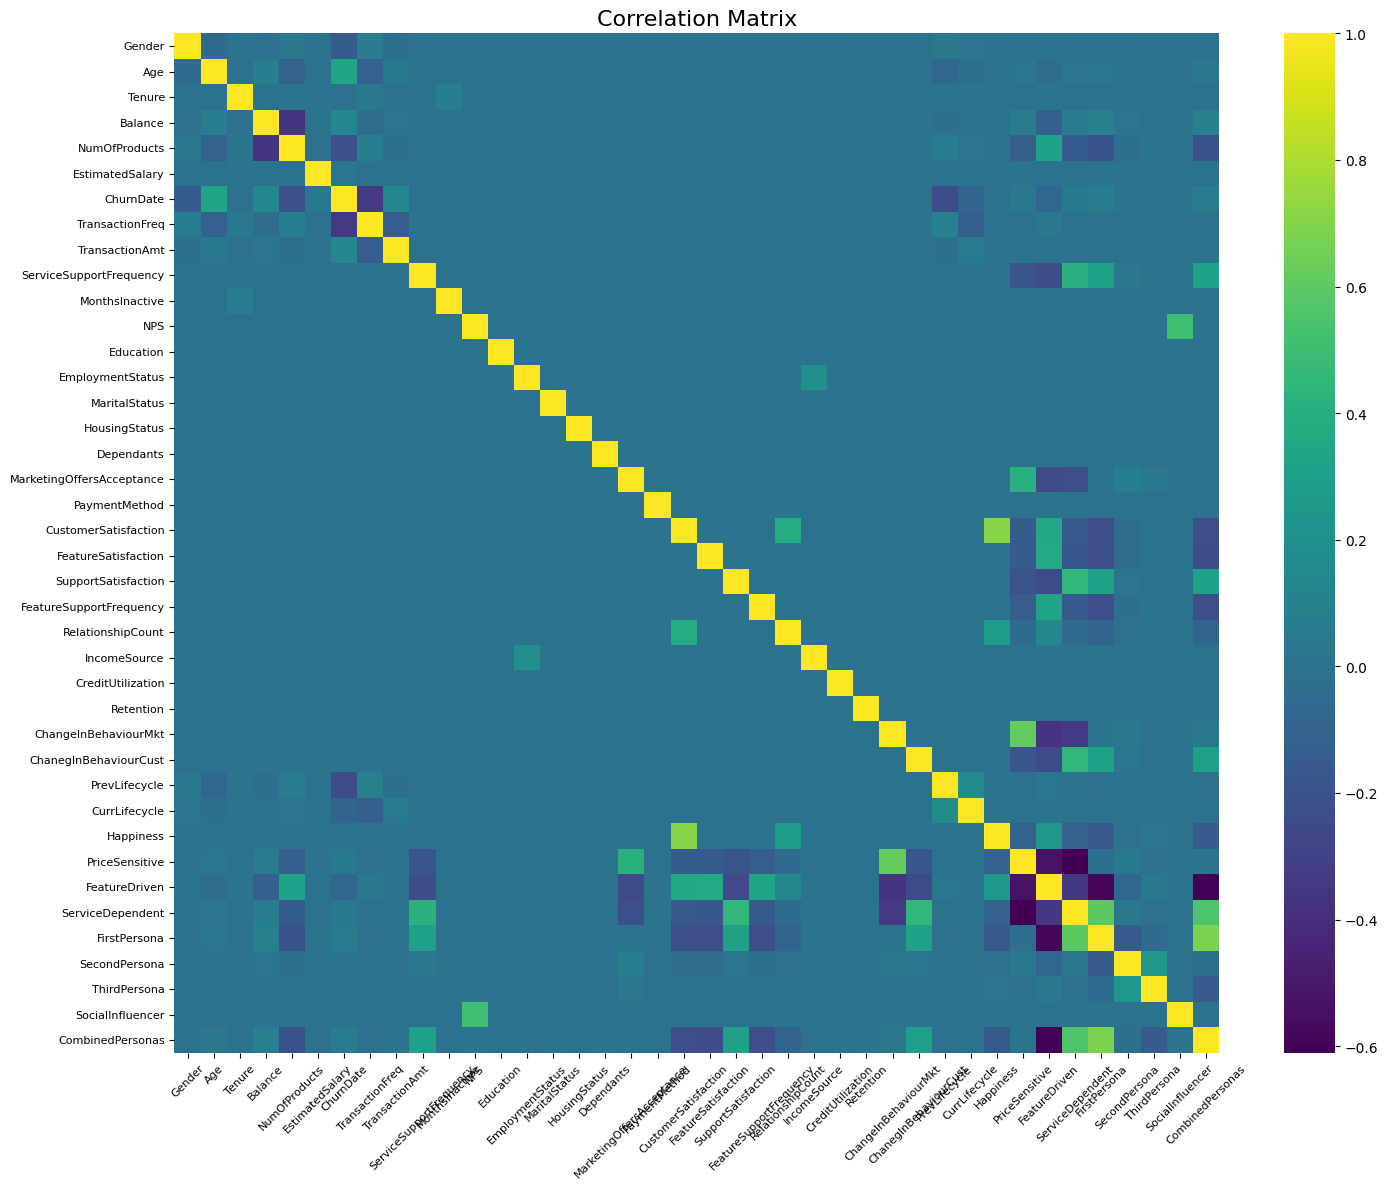

In [111]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bank_df_train is your DataFrame with both numeric and categorical columns

# Create a copy of the DataFrame
encoded_df = bank_df_train.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns using LabelEncoder
for col in encoded_df.select_dtypes(include=['object']):
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Calculate correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap for all columns without numeric annotations
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')

# Customize the plot
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Display the plot
plt.tight_layout()
plt.show()

# Identify highly correlated columns
correlated_columns = []
threshold = 0.75   # Adjust as needed

for col in corr_matrix.columns:
    correlated_cols = corr_matrix.index[(corr_matrix[col] > threshold) | (corr_matrix[col] < -threshold)].tolist()
    correlated_cols.remove(col)  # Remove the current column itself
    correlated_columns.extend([(col, corr) for corr in correlated_cols])

# Print highly correlated columns and their correlations
for col, corr in correlated_columns:
    print(f"{col} and {corr}: {corr_matrix.loc[col, corr]}")

### 2. LDA

In [112]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# # Assuming bank_df_train is already defined and contains your data

# # Create a copy of bank_df_train
# test_df = bank_df_train.copy()

# # Separate features and target
# y = test_df['Exited']
# X = test_df.drop(columns=['Exited'])  # Drop 'Exited' column and create X

# # Convert X and y to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Reshape y to a 1D array if needed
# if y.ndim > 1:
#     y = y.ravel()

# # Initialize LDA model
# lda = LinearDiscriminantAnalysis(n_components=1)  # Set the number of components (dimensions)

# # Fit the model to the data
# lda.fit(X, y)

# # Transform the data
# X_lda = lda.transform(X)

# # Add the transformed data to the DataFrame
# test_df['LDA_Component'] = X_lda

# # Print the DataFrame with LDA component
# print(test_df)


### 3. Try MCA 

In [113]:
col_idx = [(i, column_name) for i, column_name in enumerate(bank_df_train.columns)]

In [114]:
X_train_1 = bank_df_train.iloc[:, [1] + list(range(14, 17)) + [20, 26]]
X_train_2 = bank_df_train.iloc[:, 21:38]

In [115]:
# mca = prince.MCA(n_components=2)
# mca = mca.fit(X_train_1)

In [116]:
# mca.column_contributions_.head().style.format('{:.0%}')

### 4. FAMD

In [117]:
# famd = prince.FAMD(n_components=2)
# famd = famd.fit(X_train_2)

# Export to csv

In [118]:
bank_df_train.to_csv('./data/final/train_data.csv', index=False)
bank_df_test.to_csv('./data/final/test_data.csv', index=False)


# Model Training

In [119]:
bank_df_train 
bank_df_test #missing ChurnDate and CurrLifecycle

,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,TransactionFreq,TransactionAmt,ServiceSupportFrequency,MonthsInactive,...,ChanegInBehaviourCust,PrevLifecycle,Happiness,PriceSensitive,FeatureDriven,ServiceDependent,FirstPersona,SecondPersona,ThirdPersona,SocialInfluencer
0,Female,23,2,0,2,"160,977",0,0,0,0,...,1,Dormant,0,28,48,24,PriceSensitive,NaN,NaN,0
1,Female,46,2,0,1,"72,549",0,0,0,0,...,1,Dormant,0,42,32,26,PriceSensitive,NaN,NaN,0
2,Female,34,7,0,2,"138,882",0,0,7,0,...,1,Dormant,1,17,55,28,FeatureDriven,NaN,NaN,0
3,Male,36,8,0,1,"113,932",0,0,2,1,...,1,Active,0,34,40,27,ServiceDependent,FeatureDriven,NaN,0
4,Male,38,10,"121,264",1,"139,431",0,0,33,0,...,1,Dormant,1,23,38,39,FeatureDriven,ServiceDependent,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,Male,29,7,"116,100",1,"148,088",2,"-3,922,504",2,0,...,1,Reactivated,0,16,38,45,ServiceDependent,FeatureDriven,NaN,0
110019,Female,36,4,"178,033",1,"42,182",65,"89,990",46,0,...,1,Active,0,35,18,47,FeatureDriven,NaN,NaN,0
110020,Male,31,2,0,2,"16,287",0,0,6,0,...,1,Active,0,38,30,32,ServiceDependent,FeatureDriven,NaN,0
110021,Female,32,3,0,1,"158,817",28,"421,145",31,0,...,1,Reactivated,0,47,29,24,FeatureDriven,NaN,NaN,0
